In [319]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
data = pd.read_csv('data_full.csv', delimiter=',')
data.describe()

Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  150000.000000                         150000.000000  150000.000000   
mean       52.295207                              0.421033     353.005076   
std        14.771866                              4.192781    2037.818523   
min         0.000000                              0.000000       0.000000   
25%        41.000000                              0.000000       0.175074   
50%        52.000000                              0.000000       0.366508   
75%        63.000000                              0.000000       0.868254   
max       109.000000                             98.000000  329664.000000   

       MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
count   1.202690e+05                    150000.000000   
mean    6.670221e+03                         8.452760   
std     1.438467e+04                         5.145951   
min     0.000000e+00                         0.000000   
25%     3.400000e+03                         5.000000   
50%     5.400000e+03                         8.000000   
75%     8.249000e+03                        11.000000   
max     3.008750e+06                        58.000000   

       NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  \
count            150000.000000                 150000.000000   
mean                  0.265973                      1.018240   
std                   4.169304                      1.129771   
min                   0.000000                      0.000000   
25%                   0.000000                      0.000000   
50%                   0.000000                      1.000000   
75%                   0.000000                      2.000000   
max                  98.000000                     54.000000   

       NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  
count                         150000.000000       146076.000000  
mean                               0.240387            0.757222  
std                                4.155179            1.115086  
min                                0.000000            0.000000  
25%                                0.000000            0.000000  
50%                                0.000000            0.000000  
75%                                0.000000            1.000000  
max                               98.000000           20.000000

In [320]:
data['DebtRatio'] = np.where(pd.isnull(data['MonthlyIncome']), data['DebtRatio'], data['MonthlyIncome'] * data['DebtRatio'])

In [321]:
data.head(10)

Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0   1                 1                              0.766127   45   
1   2                 0                              0.957151   40   
2   3                 0                              0.658180   38   
3   4                 0                              0.233810   30   
4   5                 0                              0.907239   49   
5   6                 0                              0.213179   74   
6   7                 0                              0.305682   57   
7   8                 0                              0.754464   39   
8   9                 0                              0.116951   27   
9  10                 0                              0.189169   57   

   NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  MonthlyIncome  \
0                                     2   7323.197016         9120.0   
1                                     0    316.878123         2600.0   
2                                     1    258.914887         3042.0   
3                                     0    118.963951         3300.0   
4                                     1   1584.975094        63588.0   
5                                     0   1314.624392         3500.0   
6                                     0   5710.000000            NaN   
7                                     0    734.790059         3500.0   
8                                     0     46.000000            NaN   
9                                     0  14359.393699        23684.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   
5                                3                        0   
6                                8                        0   
7                                8                        0   
8                                2                        0   
9                                9                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   
5                             1                                     0   
6                             3                                     0   
7                             0                                     0   
8                             0                                     0   
9                             4                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0  
5                 1.0  
6                 0.0  
7                 0.0  
8                 NaN  
9                 2.0

In [322]:
data = data.rename(columns={'DebtRatio' : 'Debt'})

In [323]:
data

Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0            1                 1                              0.766127   45   
1            2                 0                              0.957151   40   
2            3                 0                              0.658180   38   
3            4                 0                              0.233810   30   
4            5                 0                              0.907239   49   
5            6                 0                              0.213179   74   
6            7                 0                              0.305682   57   
7            8                 0                              0.754464   39   
8            9                 0                              0.116951   27   
9           10                 0                              0.189169   57   
10          11                 0                              0.644226   30   
11          12                 0                              0.018798   51   
12          13                 0                              0.010352   46   
13          14                 1                              0.964673   40   
14          15                 0                              0.019657   76   
15          16                 0                              0.548458   64   
16          17                 0                              0.061086   78   
17          18                 0                              0.166284   53   
18          19                 0                              0.221813   43   
19          20                 0                              0.602794   25   
20          21                 0                              0.200923   43   
21          22                 1                              0.025656   38   
22          23                 0                              1.000000   39   
23          24                 0                              0.075427   32   
24          25                 0                              0.046560   58   
25          26                 1                              0.392248   50   
26          27                 0                              0.052436   58   
27          28                 0                              0.034421   69   
28          29                 0                              0.452516   24   
29          30                 0                              0.392995   58   
...        ...               ...                                   ...  ...   
149970  149971                 0                              0.025449   58   
149971  149972                 0                              0.058001   83   
149972  149973                 0                              0.071273   42   
149973  149974                 0                              1.026395   44   
149974  149975                 0                              0.962721   61   
149975  149976                 0                              0.022088   58   
149976  149977                 0                              0.000627   76   
149977  149978                 0                              0.236450   29   
149978  149979                 0                              0.917635   52   
149979  149980                 1                              0.224711   55   
149980  149981                 0                              0.067644   64   
149981  149982                 0                              0.810012   43   
149982  149983                 0                              0.021046   37   
149983  149984                 0                              0.002485   82   
149984  149985                 0                              0.037548   84   
149985  149986                 0                              0.954409   26   
149986  149987                 0                              0.168102   49   
149987  149988                 0                              1.000000   28   
149988  149989                 0                              

In [324]:
mean = data['MonthlyIncome'].mean()

In [325]:
mean

6670.221237392844

In [326]:
data['MonthlyIncome'] = np.where(pd.isnull(data['MonthlyIncome']), mean, data['MonthlyIncome'])

In [327]:
data.head(20)

Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0    1                 1                              0.766127   45   
1    2                 0                              0.957151   40   
2    3                 0                              0.658180   38   
3    4                 0                              0.233810   30   
4    5                 0                              0.907239   49   
5    6                 0                              0.213179   74   
6    7                 0                              0.305682   57   
7    8                 0                              0.754464   39   
8    9                 0                              0.116951   27   
9   10                 0                              0.189169   57   
10  11                 0                              0.644226   30   
11  12                 0                              0.018798   51   
12  13                 0                              0.010352   46   
13  14                 1                              0.964673   40   
14  15                 0                              0.019657   76   
15  16                 0                              0.548458   64   
16  17                 0                              0.061086   78   
17  18                 0                              0.166284   53   
18  19                 0                              0.221813   43   
19  20                 0                              0.602794   25   

    NumberOfTime30-59DaysPastDueNotWorse          Debt  MonthlyIncome  \
0                                      2   7323.197016    9120.000000   
1                                      0    316.878123    2600.000000   
2                                      1    258.914887    3042.000000   
3                                      0    118.963951    3300.000000   
4                                      1   1584.975094   63588.000000   
5                                      0   1314.624392    3500.000000   
6                                      0   5710.000000    6670.221237   
7                                      0    734.790059    3500.000000   
8                                      0     46.000000    6670.221237   
9                                      0  14359.393699   23684.000000   
10                                     0    773.690525    2500.000000   
11                                     0   3455.468469    6501.000000   
12                                     0   3715.701650   12454.000000   
13                                     3   5246.617034   13700.000000   
14                                     0      0.000000       0.000000   
15                                     0   2384.790109   11362.000000   
16                                     0   2058.000000    6670.221237   
17                                     0   1656.811728    8800.000000   
18                                     0   1731.472112    3280.000000   
19                                     0     21.934132     333.000000   

    NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                13                        0   
1                                 4                        0   
2                                 2                        1   
3                                 5                        0   
4                                 7                        0   
5                                 3                        0   
6                                 8                        0   
7                                 8                        0   
8                                 2                        0   
9                                 9                        0   
10                                5                        0   
11                                7                        0   
12                               13                        0   
13                                9                        3   
14                

In [328]:
data['SeriousDlqin2yrs'].groupby(data['NumberOfDependents']).mean()

NumberOfDependents
0.0     0.058629
1.0     0.073529
2.0     0.081139
3.0     0.088263
4.0     0.103774
5.0     0.091153
6.0     0.151899
7.0     0.098039
8.0     0.083333
9.0     0.000000
10.0    0.000000
13.0    0.000000
20.0    0.000000
Name: SeriousDlqin2yrs, dtype: float64

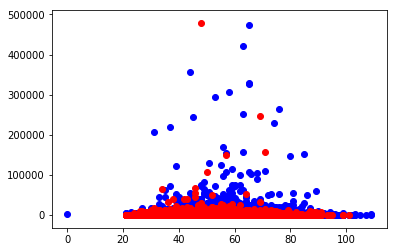

In [329]:
data1 = data[data['SeriousDlqin2yrs'] == 0]
data2 = data[data['SeriousDlqin2yrs'] == 1]

x = data1['age']
y = data1['Debt']
plt.scatter(x, y, color='b')

x2 = data2['age']
y2 = data2['Debt']
plt.scatter(x2, y2, color='r')

plt.show()

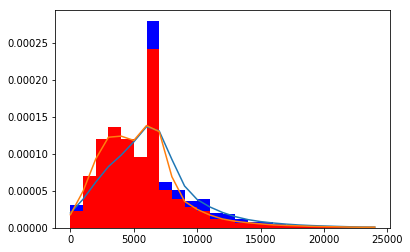

In [330]:
fig, ax = plt.subplots()
d = data1['MonthlyIncome']
d2 = data2['MonthlyIncome']
density = stats.gaussian_kde(d)
density2 = stats.gaussian_kde(d2)
_, x, _ = ax.hist(d, bins=range(0,25000, 1000), density=True, color='b')
plt.plot(x, density(x))
_, x2, _ = ax.hist(d2, bins=range(0,25000, 1000), density=True, color='r')
plt.plot(x2, density2(x2))
plt.show()